# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [3]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [4]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
ファストリ
任天堂
キーエンス
ＮＴＴ
中外薬
三井住友ＦＧ
リクルート
伊藤忠
ＫＤＤＩ
三菱商
東京海上
ＳＢＧ
ＳＢ
東エレク
三菱重
みずほＦＧ
ＪＴ
信越化
三井物
ホンダ
武田
第一三共
富士通
キヤノン
ＨＯＹＡ
ＯＬＣ
['7203', '6758', '8306', '6501', '9983', '7974', '6861', '9432', '4519', '8316', '6098', '8001', '9433', '8058', '8766', '9984', '9434', '8035', '7011', '8411', '2914', '4063', '8031', '7267', '4502', '4568', '6702', '7751', '7741', '4661']


In [5]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [6]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,9983,7974,6861,9432,4519,8316,...,2914,4063,8031,7267,4502,4568,6702,7751,7741,4661
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.969175,0.988840,0.984000,0.983236,0.992379,...,0.972455,0.980535,0.970608,1.031250,0.994306,0.994916,0.986138,0.984179,0.988415,0.998713
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.975975,0.988193,0.983333,0.999574,0.980088,...,0.990419,0.984738,0.975727,1.032280,0.995401,0.994113,0.964055,0.994658,1.003673,1.002575
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,1.027199,0.993692,0.992000,1.007387,0.985988,...,0.993772,0.990047,0.987450,1.025412,0.992992,0.996521,0.964055,0.996507,1.006782,0.996138
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.985554,0.983656,0.982321,0.973799,0.994573,1.000426,0.982036,...,1.005749,0.986347,0.988415,0.973980,0.999776,0.989749,1.011334,0.989727,0.991806,0.984516
2025-03-31,0.941515,0.977414,0.923112,0.925094,0.947527,0.916591,0.945819,0.981683,0.965904,0.946856,...,0.985389,0.948075,0.940060,0.944093,0.987690,0.947127,0.955635,0.954387,0.948290,0.950000
2025-04-01,0.946734,0.977414,0.915309,0.919743,0.955699,0.925204,0.936115,0.980326,0.964342,0.934132,...,0.995928,0.947851,0.948623,0.945851,1.009176,1.004316,0.960492,0.965276,0.931619,0.943226
2025-04-02,0.955911,0.957944,0.901308,0.927501,0.991398,0.944696,0.935145,0.968114,0.935502,0.918413,...,0.986826,0.945837,0.936199,0.957103,0.997762,0.966280,0.957416,0.964660,0.930206,0.924677
2025-04-03,0.906424,0.911734,0.836814,0.867576,0.974194,0.913871,0.898916,0.966757,0.941611,0.847804,...,0.969581,0.921218,0.914876,0.934951,1.016115,0.979768,0.929080,0.916992,0.887821,0.919355
2025-04-04,0.866475,0.868380,0.765894,0.817014,0.965591,0.904533,0.884522,0.977612,0.945305,0.779691,...,0.973892,0.871531,0.890698,0.883966,1.002014,0.976531,0.909812,0.880214,0.883865,0.941290


In [7]:
summary

,7203,6758,8306,6501,9983,7974,6861,9432,4519,8316,...,2914,4063,8031,7267,4502,4568,6702,7751,7741,4661
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.969175,0.988840,0.984000,0.983236,0.992379,...,0.972455,0.980535,0.970608,1.031250,0.994306,0.994916,0.986138,0.984179,0.988415,0.998713
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.975975,0.988193,0.983333,0.999574,0.980088,...,0.990419,0.984738,0.975727,1.032280,0.995401,0.994113,0.964055,0.994658,1.003673,1.002575
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,1.027199,0.993692,0.992000,1.007387,0.985988,...,0.993772,0.990047,0.987450,1.025412,0.992992,0.996521,0.964055,0.996507,1.006782,0.996138
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.985554,0.983656,0.982321,0.973799,0.994573,1.000426,0.982036,...,1.005749,0.986347,0.988415,0.973980,0.999776,0.989749,1.011334,0.989727,0.991806,0.984516
2025-03-31,0.941515,0.977414,0.923112,0.925094,0.947527,0.916591,0.945819,0.981683,0.965904,0.946856,...,0.985389,0.948075,0.940060,0.944093,0.987690,0.947127,0.955635,0.954387,0.948290,0.950000
2025-04-01,0.946734,0.977414,0.915309,0.919743,0.955699,0.925204,0.936115,0.980326,0.964342,0.934132,...,0.995928,0.947851,0.948623,0.945851,1.009176,1.004316,0.960492,0.965276,0.931619,0.943226
2025-04-02,0.955911,0.957944,0.901308,0.927501,0.991398,0.944696,0.935145,0.968114,0.935502,0.918413,...,0.986826,0.945837,0.936199,0.957103,0.997762,0.966280,0.957416,0.964660,0.930206,0.924677
2025-04-03,0.906424,0.911734,0.836814,0.867576,0.974194,0.913871,0.898916,0.966757,0.941611,0.847804,...,0.969581,0.921218,0.914876,0.934951,1.016115,0.979768,0.929080,0.916992,0.887821,0.919355
2025-04-04,0.866475,0.868380,0.765894,0.817014,0.965591,0.904533,0.884522,0.977612,0.945305,0.779691,...,0.973892,0.871531,0.890698,0.883966,1.002014,0.976531,0.909812,0.880214,0.883865,0.941290


In [8]:
df_ranking = summary.tail(1).iloc[0].sort_values(ascending=False)
df_ranking

4519    1.139082
7011    1.059654
2914    1.049581
9433    1.040008
7974    1.036718
9983    1.031398
7267    1.020745
9434    1.019755
6702    1.018459
8001    1.017910
4661    1.014516
9432    1.010855
7203    1.002879
6501    1.002408
6861    0.984797
8058    0.984557
4063    0.965309
8031    0.961719
4502    0.961056
8035    0.951099
4568    0.947667
7741    0.938966
8766    0.919012
6758    0.913811
6098    0.912603
7751    0.904459
9984    0.896250
8316    0.837575
8411    0.816092
8306    0.813404
Name: 2025-04-28 00:00:00, dtype: float64

In [12]:
list_ranking = df_ranking.index[0:14]
for code in list_ranking:
    get_code_into(code)
    print()

print('Median')
print(summary.median(axis=1).tail(3))

4519 Chugai Pharmaceutical Co., Ltd.
2025-04-24    1.172184
2025-04-25    1.175451
2025-04-28    1.139082
Name: Close, dtype: float64

7011 Mitsubishi Heavy Industries, Ltd.
2025-04-24    1.014866
2025-04-25    1.034626
2025-04-28    1.059654
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-24    1.039760
2025-04-25    1.042874
2025-04-28    1.049581
Name: Close, dtype: float64

9433 KDDI Corporation
2025-04-24    1.024620
2025-04-25    1.034058
2025-04-28    1.040008
Name: Close, dtype: float64

7974 Nintendo Co., Ltd.
2025-04-24    0.997280
2025-04-25    1.033545
2025-04-28    1.036718
Name: Close, dtype: float64

9983 Fast Retailing Co., Ltd.
2025-04-24    0.994624
2025-04-25    1.005376
2025-04-28    1.031398
Name: Close, dtype: float64

7267 Honda Motor Co., Ltd.
2025-04-24    1.003868
2025-04-25    1.010900
2025-04-28    1.020745
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-24    1.000941
2025-04-25    1.000470
2025-04-28    1.019755
Name: Close, dtype: fl

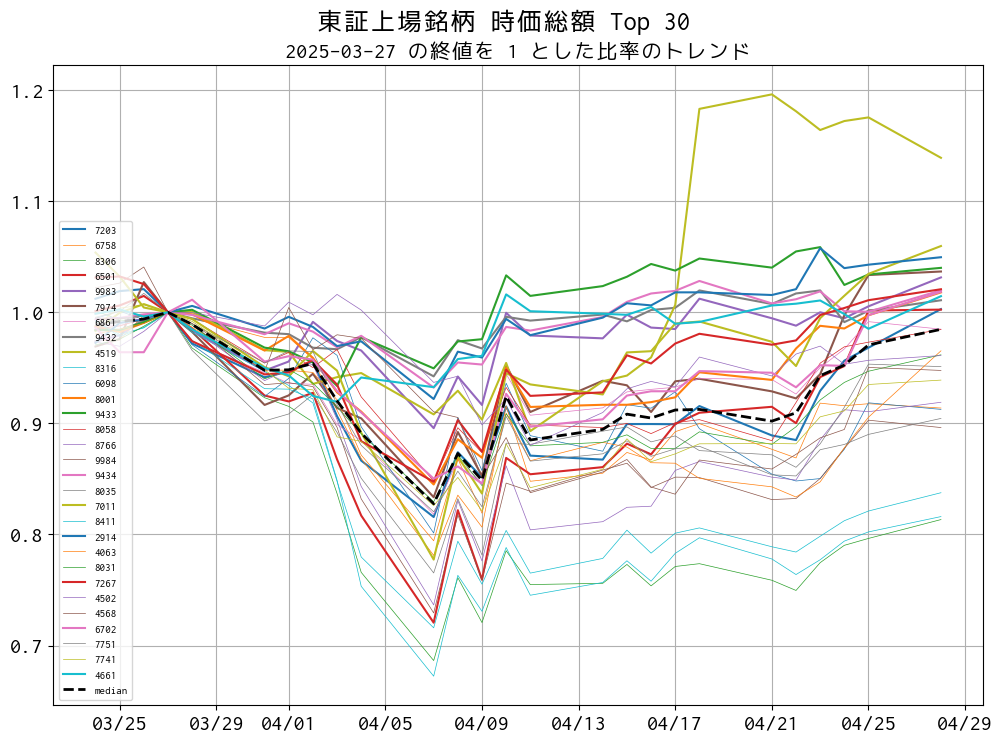

In [13]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    if colname in list_ranking:
        width = 1.5
        lstyle = 'solid'
    else:
        width = 0.5
        lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [14]:
summary.median(axis=1)

2025-03-24    0.988628
2025-03-25    0.991767
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.989071
2025-03-31    0.947801
2025-04-01    0.948237
2025-04-02    0.953953
2025-04-03    0.920286
2025-04-04    0.891153
2025-04-07    0.827678
2025-04-08    0.872879
2025-04-09    0.848856
2025-04-10    0.924382
2025-04-11    0.885028
2025-04-14    0.894629
2025-04-15    0.908320
2025-04-16    0.904825
2025-04-17    0.912041
2025-04-18    0.912590
2025-04-21    0.902038
2025-04-22    0.909500
2025-04-23    0.942962
2025-04-24    0.952486
2025-04-25    0.970629
2025-04-28    0.984677
dtype: float64